In [ ]:
#cluster 2018 records

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('tickets_table.csv')

df.columns

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ticketnumber', 'meterid', 'markedtime', 'make', 'bodystyle', 'color',
       'location', 'route', 'agency', 'violationcode', 'violationdescription',
       'fineamount', 'latitude', 'longitude', 'issuetime', 'dt_issuednew',
       'issuedatenew', 'issueyear', 'weekday', 'month', 'newLat', 'newLong'],
      dtype='object')

In [3]:
df['hour'] = df['issuetime'].str[3:]
df['hour'] = df['hour'].str.replace(':00', '')

In [4]:
df.head()

,ticketnumber,meterid,markedtime,make,bodystyle,color,location,route,agency,violationcode,...,longitude,issuetime,dt_issuednew,issuedatenew,issueyear,weekday,month,newLat,newLong,hour
0,4320468924,NaN,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,...,1.866284e+06,00:26:00,2018-01-13 00:26:00,2018-01-13,2018,5,1,34.120459,-118.206434,26
1,4320468935,NaN,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,...,1.866284e+06,00:27:00,2018-01-13 00:27:00,2018-01-13,2018,5,1,34.120459,-118.206434,27
2,4320468946,NaN,NaN,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,...,1.866284e+06,00:27:00,2018-01-13 00:27:00,2018-01-13,2018,5,1,34.120459,-118.206434,27
3,4320468950,NaN,NaN,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,...,1.866284e+06,00:28:00,2018-01-13 00:28:00,2018-01-13,2018,5,1,34.120459,-118.206434,28
4,4320468961,NaN,NaN,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,...,1.866284e+06,00:29:00,2018-01-13 00:29:00,2018-01-13,2018,5,1,34.120459,-118.206434,29


In [5]:
#pick # clusters based on # of agencies
df.id.nunique()

AttributeError: 'DataFrame' object has no attribute 'id'

In [7]:
exp = df
tmp = exp['violationdescription'].value_counts()
var_list = [tmp.index[i] for i in range(0, len(tmp)) if tmp[i] <2000]
var_list

['18 IN/CURB/COMM VEH',
 'WHITE CURB',
 'PK IN PROH AREA',
 'PARKED IN CROSSWALK',
 'PARKED IN BUS ZONE',
 'COMM TRAILER/22 FT.',
 'PREF PARKING',
 'SAFETY ZONE/CURB',
 'RESTRICTED TAXI ZONE',
 '22500H',
 'DSPLYPLATE A',
 'NO STOPPING/STANDING',
 'BLK BIKE PATH OR LANE',
 'PARKING/FRONT YARD',
 'DISABLED PARKING/CROSS HATCH',
 'NO PARKING BETWEEN POSTED HOURS',
 'HANDICAP/NO DP ID',
 'PARKING AREA',
 'CITY PARK/PROHIB',
 'OFF STR MTR/OUT LINE',
 '18 IN. CURB/1 WAY',
 'WITHIN INTERSECTION',
 'GREEN ZONE',
 'RED CURB',
 'OVERNIGHT PARKING',
 'PARKED IN FIRE LANE',
 'DP- RO NOT PRESENT',
 'PK OUTSD PK STL',
 '22502A',
 'DP-BLKNG ACCESS RAMP',
 'PK OVERSIZ',
 '22514',
 'TIME LIMIT/CITY LOT',
 'STNDNG IN ALLEY',
 'CARSHARE PARKING',
 '22500F',
 '5204',
 'NO PK BET 1-3AM',
 'PKD IN/ON PARKWAY',
 '3 FT. SIDEWALK RAMP',
 'NO STOP/STAND AM',
 '5200',
 '22500E',
 'NO STOP/STAND PM',
 'PKD OVER TIME LIMIT',
 'PARKING OUTSIDE PARKING STALLS',
 '2251157A',
 'PK OTSD PSTD AR',
 'PARK IN GRID LOCK ZN

In [8]:
df2 = df[~df['violationdescription'].isin(var_list)]


In [9]:
df2.violationdescription.value_counts()

NO PARK/STREET CLEAN              375202
METER EXP.                        202940
RED ZONE                          103191
PREFERENTIAL PARKING               99343
DISPLAY OF TABS                    75655
NO PARKING                         59493
PARKED OVER TIME LIMIT             43190
DISPLAY OF PLATES                  38563
WHITE ZONE                         26873
NO STOP/STANDING                   23644
BLOCKING DRIVEWAY                  18179
STANDNG IN ALLEY                   16849
NO STOPPING/ANTI-GRIDLOCK ZONE     15317
NO STOP/STAND                      13364
YELLOW ZONE                        13207
STOP/STAND PROHIBIT                13121
FIRE HYDRANT                       10933
PARKED ON SIDEWALK                 10788
EXCEED 72HRS-ST                    10151
18 IN. CURB/2 WAY                  10067
DOUBLE PARKING                      8869
OFF STR/OVERTIME/MTR                8485
OUTSIDE LINES/METER                 6384
PARKED IN PARKWAY                   5425
COMM VEH OVER TI

In [11]:
#fix names of meter expired etc.

In [12]:
df2['violationdescription'] = df2['violationdescription'].str.replace('METER EXPIRED', 'METER EXP.')
df2['violationdescription'] = df2['violationdescription'].str.replace('NO STOP/STAND', 'NO STOP/STANDING')
df2['violationdescription'] = df2['violationdescription'].str.replace('STOP/STAND PROHIBIT', 'NO STOP/STANDING')
df2['violationdescription'] = df2['violationdescription'].str.replace('NO STOP/STANDINGING', 'NO STOP/STANDING')
df2['violationdescription'] = df2['violationdescription'].str.replace('OFF STR/OVERTIME/MTR ', 'METER EXP.') 
df2.violationdescription.value_counts()

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

NO PARK/STREET CLEAN              375202
METER EXP.                        204951
RED ZONE                          103191
PREFERENTIAL PARKING               99343
DISPLAY OF TABS                    75655
NO PARKING                         59493
NO STOP/STANDING                   50129
PARKED OVER TIME LIMIT             43190
DISPLAY OF PLATES                  38563
WHITE ZONE                         26873
BLOCKING DRIVEWAY                  18179
STANDNG IN ALLEY                   16849
NO STOPPING/ANTI-GRIDLOCK ZONE     15317
YELLOW ZONE                        13207
FIRE HYDRANT                       10933
PARKED ON SIDEWALK                 10788
EXCEED 72HRS-ST                    10151
18 IN. CURB/2 WAY                  10067
DOUBLE PARKING                      8869
OFF STR/OVERTIME/MTR                8485
OUTSIDE LINES/METER                 6384
PARKED IN PARKWAY                   5425
COMM VEH OVER TIME LIMIT            5352
NO EVIDENCE OF REG                  4853
DISABLED PARKING

In [13]:
df2['violationdescription'] = df2['violationdescription'].str.replace('METER EXPIRED', 'METER EXP.')

#assign coded numbers to each different violation description
df2=df2.assign(id=(df2['violationdescription']).astype('category').cat.codes)

df2[['violationdescription','id']]

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,violationdescription,id
0,NO PARKING,13
1,DISPLAY OF PLATES,4
2,NO PARKING,13
3,NO PARKING,13
4,NO PARKING,13
5,NO PARKING,13
6,NO PARKING,13
7,NO PARKING,13
8,NO PARKING,13
9,NO PARKING,13


In [14]:
df2 = df2.sample(200000)
X = df2

In [15]:
# # Clustering

# ## Agenda:
# 
# 1. K-means clustering
# 2. Clustering evaluation
# 3. DBSCAN clustering

# dataset
df2

# How would you cluster these parking tickets?

# define X
X = X.drop(['ticketnumber', 'location','route','meterid', 'markedtime','violationdescription','make', 'bodystyle', 'color', 'violationcode', 'dt_issuednew', 'issuetime','issuedatenew', 'newLat', 'newLong'], axis=1)

In [16]:
df2beforedrop=df2
df2=df2.drop(['ticketnumber', 'location','route','meterid', 'markedtime','violationdescription','make', 'bodystyle', 'color', 'violationcode', 'dt_issuednew', 'issuetime','issuedatenew', 'newLat', 'newLong'], axis=1)

In [17]:
X.isnull().values.any()

False

In [207]:
X.id.value_counts()

12    45858
10    24749
24    12461
22    12091
5      9153
13     7373
14     6097
21     5208
4      4634
26     3334
1      2143
25     2035
15     1866
27     1646
9      1331
20     1323
7      1249
0      1228
6      1070
16     1026
17      757
2       667
19      654
11      610
3       515
18      353
23      299
8       270
Name: id, dtype: int64

In [18]:
# What happened to y?

# ## Part 1: K-means clustering

# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=18, random_state=1)
km.fit(X)


# review the cluster labels
km.labels_


# save the cluster labels and sort by cluster
df2['kmcluster'] = km.labels_


In [19]:
df2.sort_values('kmcluster')

,agency,fineamount,latitude,longitude,issueyear,weekday,month,hour,id,kmcluster
1111340,56.0,63.0,6.502953e+06,1.862112e+06,2018,0,7,44,10,0
628736,56.0,58.0,6.502855e+06,1.862122e+06,2018,2,4,42,16,0
716906,56.0,63.0,6.481000e+06,1.867809e+06,2018,3,5,01,10,0
314729,56.0,25.0,6.507159e+06,1.863596e+06,2018,3,2,08,5,0
443791,56.0,63.0,6.482491e+06,1.865109e+06,2018,2,3,31,10,0
992851,56.0,63.0,6.504055e+06,1.862760e+06,2018,4,6,38,10,0
759073,56.0,73.0,6.482226e+06,1.867181e+06,2018,4,5,58,12,0
222779,56.0,25.0,6.504076e+06,1.865862e+06,2018,4,2,12,5,0
876813,56.0,73.0,6.480648e+06,1.870165e+06,2018,2,6,47,12,0
345991,56.0,25.0,6.500124e+06,1.859388e+06,2018,2,2,27,4,0


In [31]:
# What do the clusters seem to be based on? Why?

# review the cluster centers
km.cluster_centers_


# calculate the mean of each feature for each cluster
df2.groupby('kmcluster').mean()


,agency,fineamount,latitude,longitude,issueyear,weekday,month,id
kmcluster,,,,,,,,
0,52.258370,70.277653,6.451992e+06,1.844122e+06,2018.0,1.841508,4.297242,14.154727
1,52.491601,72.161814,6.381097e+06,1.895252e+06,2018.0,2.211086,4.219765,11.899776
2,55.641328,70.996162,6.484176e+06,1.839328e+06,2018.0,2.432635,4.305514,14.666947
3,50.952438,64.899331,6.426960e+06,1.839638e+06,2018.0,2.704786,4.297462,13.336481
4,53.235362,70.002319,6.474480e+06,1.733768e+06,2018.0,2.288406,4.028406,14.022319
5,52.887697,67.425686,6.446780e+06,1.883568e+06,2018.0,2.585952,4.300665,12.369742
6,52.494828,72.560671,6.424999e+06,1.895442e+06,2018.0,2.166120,4.255172,13.021821
7,55.666113,64.857509,6.494968e+06,1.864933e+06,2018.0,2.540377,4.268528,11.611170
8,53.575184,75.473918,6.477673e+06,1.806623e+06,2018.0,1.982891,4.056336,13.880234


In [20]:
# save the DataFrame of cluster centers
centers = df2.groupby('kmcluster').mean()


# allow plots to appear in the notebook
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

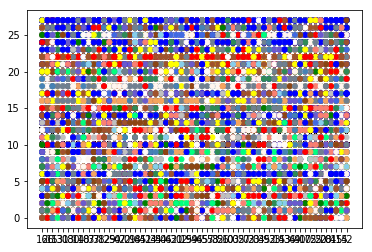

In [33]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','royalblue','saddlebrown','salmon','sandybrown','seagreen','seashell','sienna','silver','skyblue','slateblue','slategray','snow','springgreen','steelblue','tan','teal', 'turquoise'])


%matplotlib inline
# scatter plot of violationdescription (id) versus day, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df2.hour, df2.id, c=colors[df2.kmcluster], s=25)
plt.show()


Text(0,0.5,'violation type')

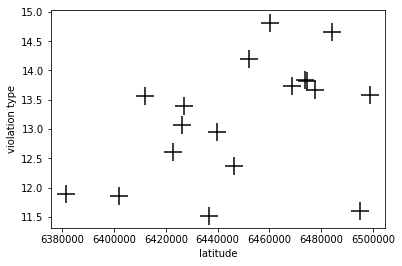

In [21]:
centers = df2.groupby('kmcluster').mean()
# cluster centers, marked by "+"
plt.scatter(centers.latitude, centers.id, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('latitude')
plt.ylabel('violation type')




Text(0,0.5,'violation type')

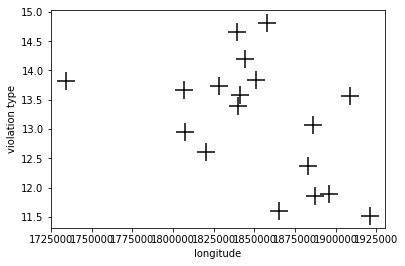

In [22]:
centers = df2.groupby('kmcluster').mean()
# cluster centers, marked by "+"
plt.scatter(centers.longitude, centers.id, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('longitude')
plt.ylabel('violation type')

Text(0,0.5,'latitude')

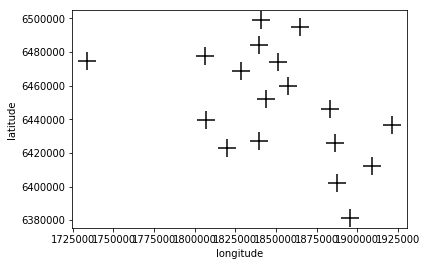

In [23]:
centers = df2.groupby('kmcluster').mean()
# cluster centers, marked by "+"
plt.scatter(centers.longitude, centers.latitude, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('longitude')
plt.ylabel('latitude')

Text(0,0.5,'violation type')

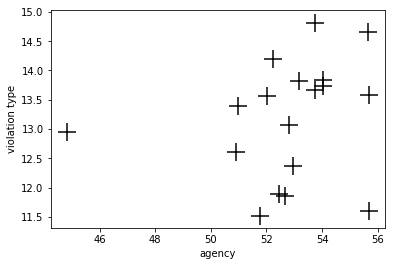

In [24]:
centers = df2.groupby('kmcluster').mean()
# cluster centers, marked by "+"
plt.scatter(centers.agency, centers.id, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('agency')
plt.ylabel('violation type')

In [34]:
X.head()

,agency,fineamount,latitude,longitude,issueyear,weekday,month,hour,id
917529,54.0,68.0,6.454711e+06,1.853107e+06,2018,2,6,16,22
932169,54.0,73.0,6.479444e+06,1.846828e+06,2018,0,6,26,12
1213861,54.0,73.0,6.474481e+06,1.849924e+06,2018,0,8,15,12
1027140,51.0,63.0,6.456339e+06,1.839984e+06,2018,0,7,13,10
430145,51.0,73.0,6.457174e+06,1.844589e+06,2018,1,3,16,12


In [129]:
#Xdf= Xdf.astype(np.float)

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  'left=%s, right=%s') % (left, right))
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a7b4f8f28>,
      dtype=object)

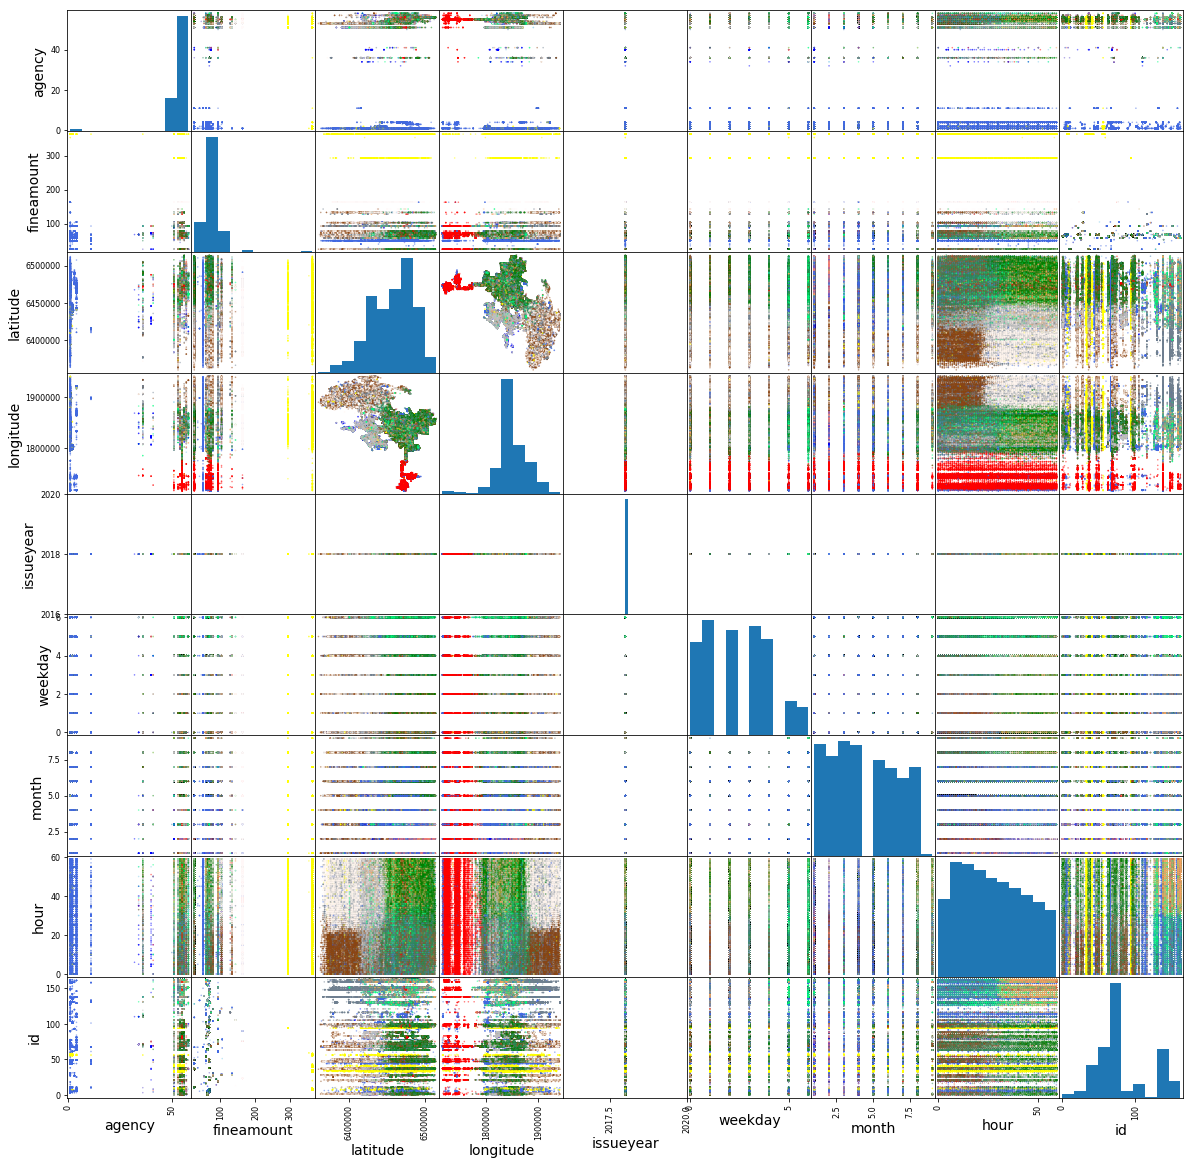

In [132]:
#entire set
#scatter plot matrix (0=red, 1=green, 2=blue)
#pd.plotting.scatter_matrix(Xdf, c=colors[df.kmcluster], figsize=(20,20), s=10)

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  'left=%s, right=%s') % (left, right))
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19bbd438>,
      dtype=object)

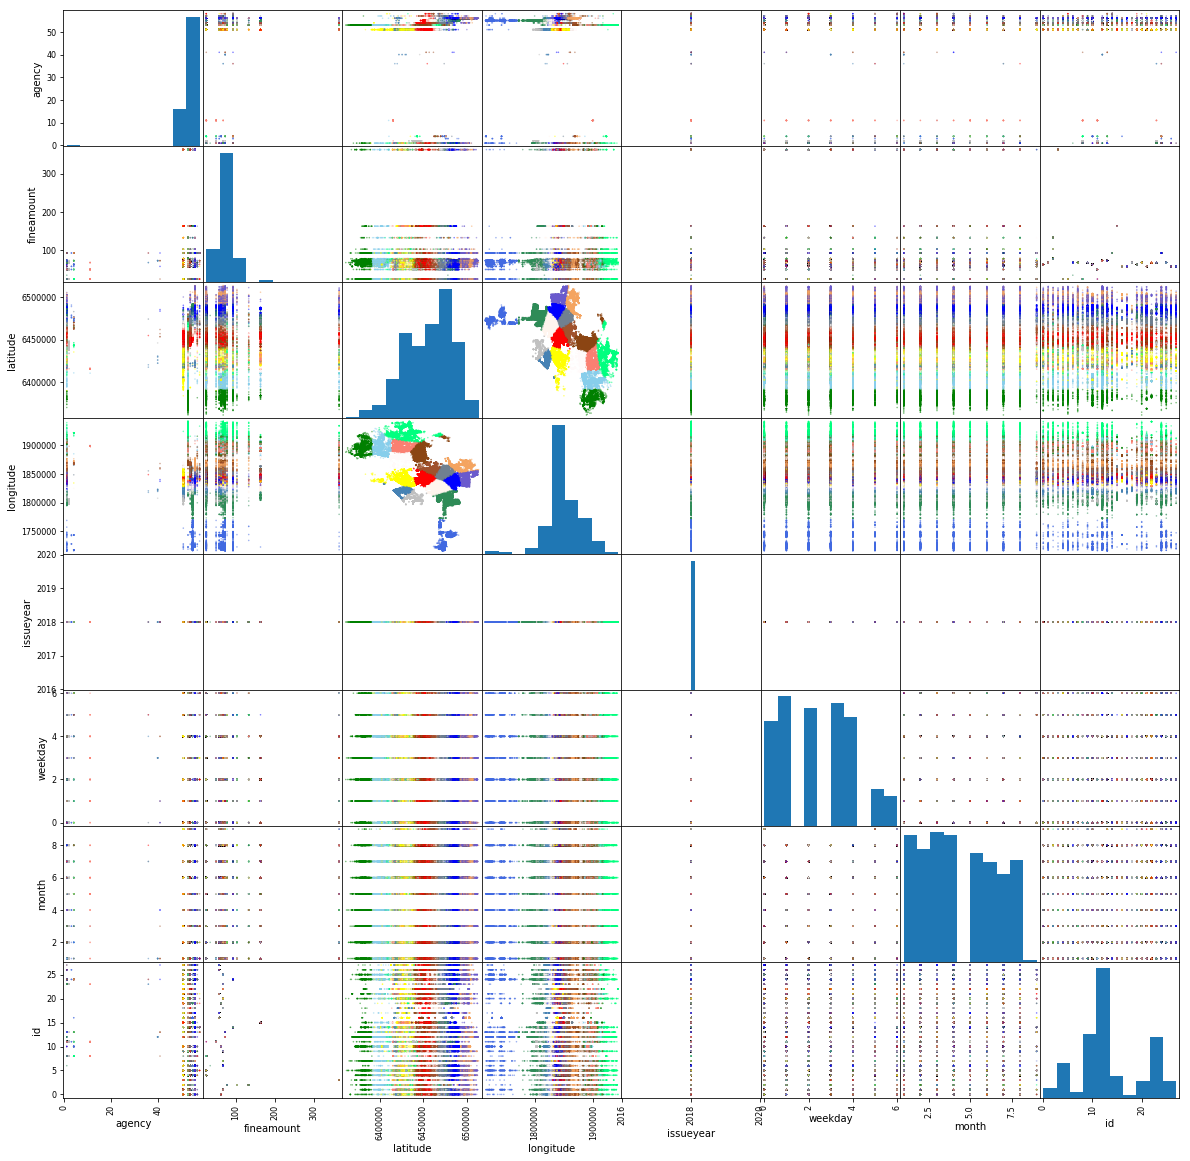

In [26]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[df2.kmcluster], figsize=(20,20), s=10)

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  'left=%s, right=%s') % (left, right))
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2534ff98>,
      dtype=object)

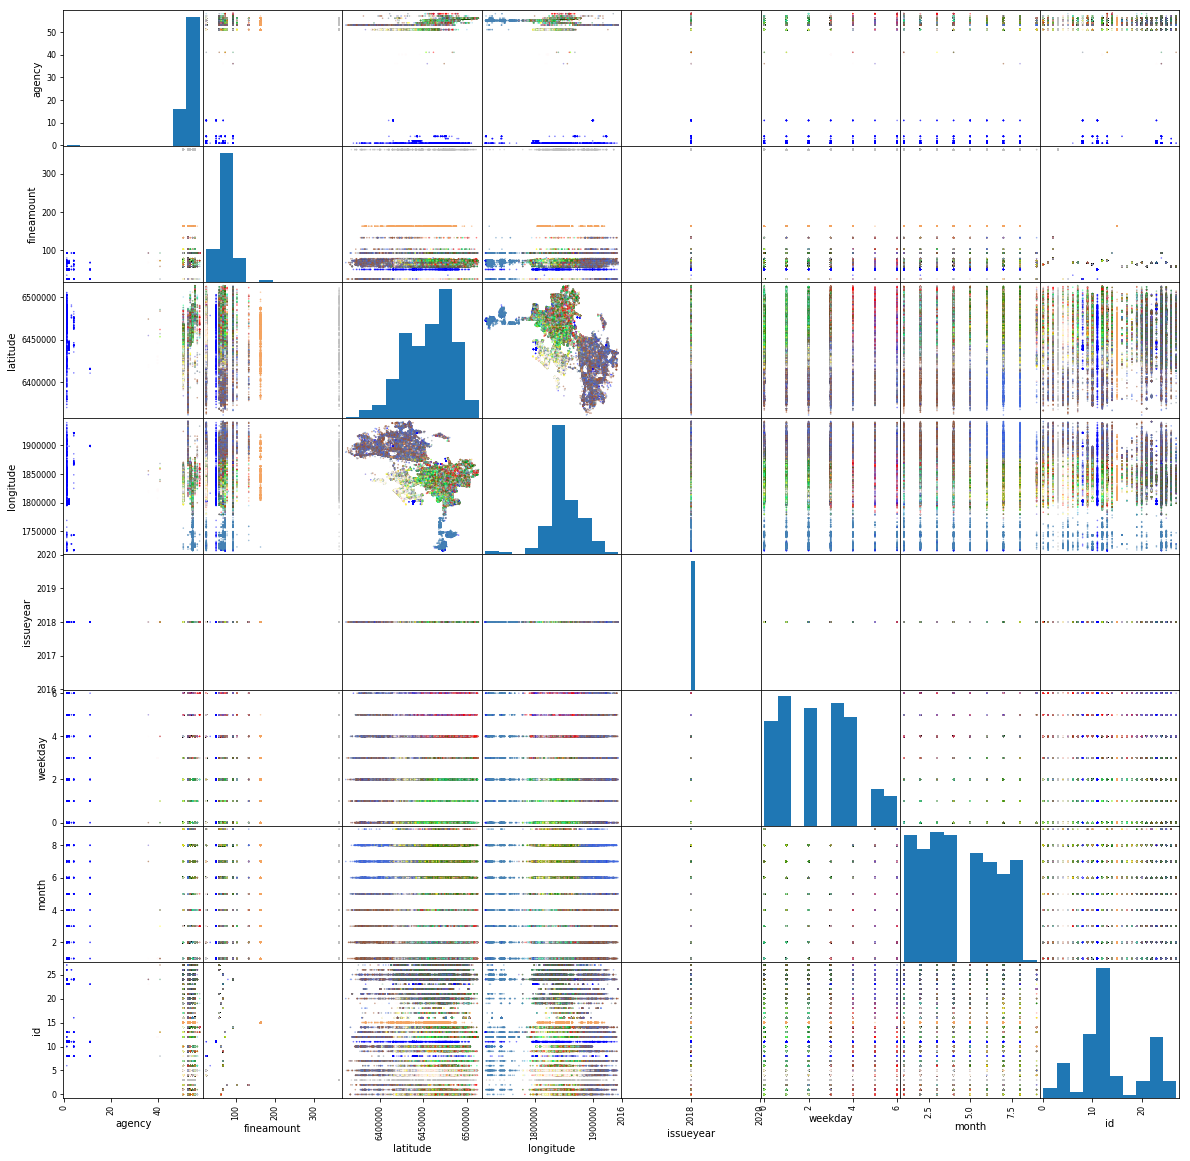

In [35]:
# ### Repeat with scaled data

# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-means with 18 clusters on scaled data
km = KMeans(n_clusters=18, random_state=1)
km.fit(X_scaled)


# save the cluster labels and sort by cluster
df2['kmcluster'] = km.labels_
df2.sort_values('kmcluster')


# What are the "characteristics" of each cluster?

# review the cluster centers
df2.groupby('kmcluster').mean()


# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[df2.kmcluster], figsize=(20,20), s=10)

In [ ]:
#Do you notice any cluster assignments that seem a bit odd? How might we explain those?

# ## Part 2: Clustering evaluation
# 
# The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.
# 
# A Silhouette Coefficient is calculated for **each observation**:
# 
# $$SC = \frac{b-a} {max(a, b)}$$
# 
# - a = mean distance to all other points in **its cluster**
# - b = mean distance to all other points in **the next nearest cluster**
# 
# It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)


# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))


# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)





In [ ]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
df2['kmcluster'] = km.labels_
df2.sort('kmcluster')

In [ ]:
# ## Part 3: DBSCAN clustering

# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)


# review the cluster labels
db.labels_


# save the cluster labels and sort by cluster
df2['kmcluster'] = db.labels_
beer.sort('cluster')


# review the cluster centers
df2.groupby('kmcluster').mean()


# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[df2.kmcluster], figsize=(10,10), s=100)
